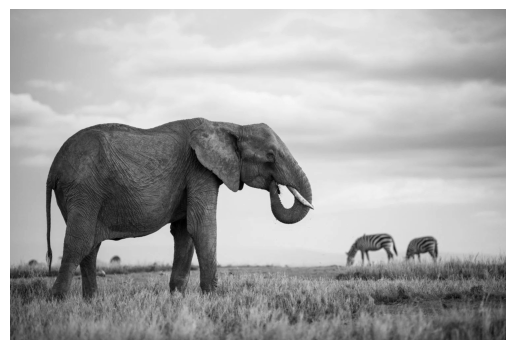

(1000, 1500)


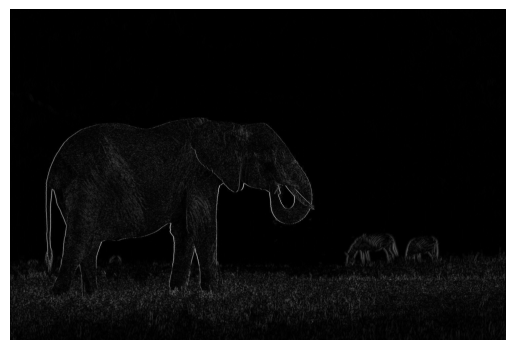

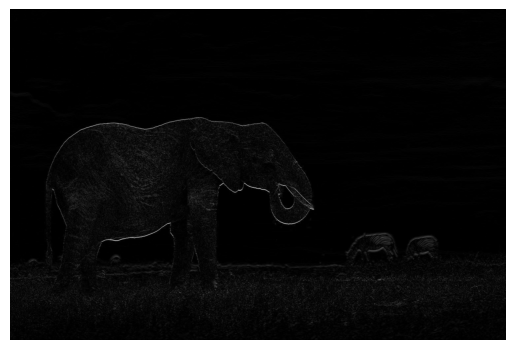

3.545098039215686


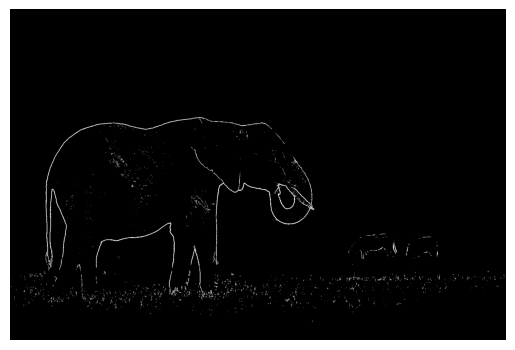

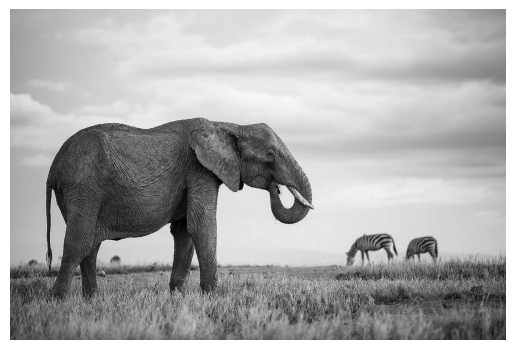

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('image', cmap='gray')  # default to grayscale colormap for monochrome
from skimage import io as io
import cv2 as cv
from scipy.ndimage import gaussian_filter as smooth
from skimage.color import rgb2gray
from scipy.ndimage import gaussian_filter as smooth

def imshow(img):
    plt.imshow(img)
    plt.axis('off')
    plt.show()

import matplotlib.cm as cm
def surf(M,azim=-60):
    [nrow,ncol] = M.shape
    [xg,yg] = np.meshgrid(np.array(range(ncol)),np.array(range(nrow,0,-1)))
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.plot_surface(xg,yg,M, cmap=cm.plasma,linewidth=0, antialiased=True)
    ax.azim = azim

img = rgb2gray(io.imread('elephant.jpg'))
imshow(img)
print(img.shape)
#surf(img)
adx = np.abs(cv.filter2D(src=img, ddepth=-1, kernel=np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])))
ady = np.abs(cv.filter2D(src=img, ddepth=-1, kernel=np.transpose(np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]))))
imshow(adx)
imshow(ady)
print(np.max(adx))
gmag = np.sqrt(adx*adx+ady*ady)
#imshow(gmag[350:400,250:300]>1.0)
imshow(gmag>1.0)
#imshow(cv.filter2D(src=img, ddepth=-1, kernel=np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])))
imshow(np.clip(cv.filter2D(src=img, ddepth=-1, kernel=np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])),0,1))
#imshow(cv.filter2D(src=img, ddepth=-1, kernel=np.ones((5,5))))


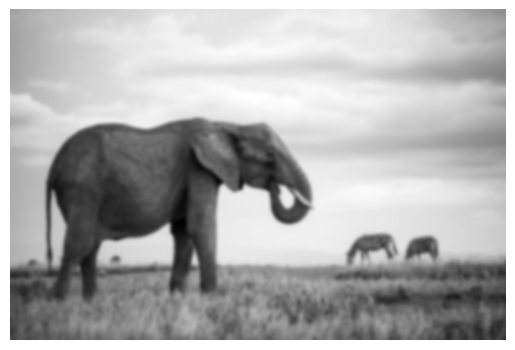

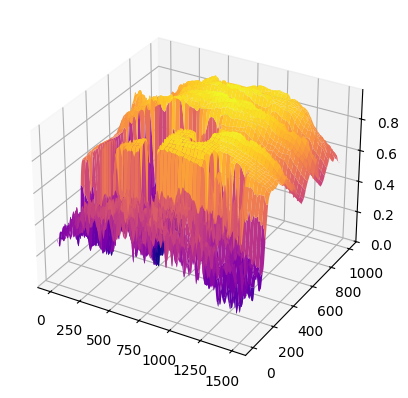

In [15]:
simg = smooth(img,5)
imshow(simg)
surf(simg)